In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset has total 908 rows and 25 colums

In [27]:
df.shape

(908, 25)

In [28]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [29]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [30]:
df=df.drop(['country','country_long','name','gppd_idnr','geolocation_source','source','url'],axis='columns')
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               908 non-null    float64
 1   latitude                  862 non-null    float64
 2   longitude                 862 non-null    float64
 3   primary_fuel              908 non-null    object 
 4   other_fuel1               199 non-null    object 
 5   other_fuel2               1 non-null      object 
 6   other_fuel3               0 non-null      float64
 7   commissioning_year        528 non-null    float64
 8   owner                     342 non-null    object 
 9   wepp_id                   0 non-null      float64
 10  year_of_capacity_data     520 non-null    float64
 11  generation_gwh_2013       384 non-null    float64
 12  generation_gwh_2014       401 non-null    float64
 13  generation_gwh_2015       425 non-null    float64
 14  generation

In [32]:
df.isna().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [33]:
df.fillna(df.median(),inplace=True)
df.isna().sum()

capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                       566
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [34]:
df=df.drop(['wepp_id','other_fuel1','other_fuel2','other_fuel3','owner','generation_data_source','estimated_generation_gwh'],axis='columns')
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,Coal,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,Wind,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,Gas,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,2018.0,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,Wind,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,Coal,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700


In [35]:
df.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    object 
 4   commissioning_year     908 non-null    float64
 5   year_of_capacity_data  908 non-null    float64
 6   generation_gwh_2013    908 non-null    float64
 7   generation_gwh_2014    908 non-null    float64
 8   generation_gwh_2015    908 non-null    float64
 9   generation_gwh_2016    908 non-null    float64
 10  generation_gwh_2017    908 non-null    float64
dtypes: float64(10), object(1)
memory usage: 78.2+ KB


In [37]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,Coal,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,Wind,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,Gas,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,2018.0,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,Wind,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,Coal,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700


In [38]:
df.dtypes

capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
year_of_capacity_data    float64
generation_gwh_2013      float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
dtype: object

<AxesSubplot:>

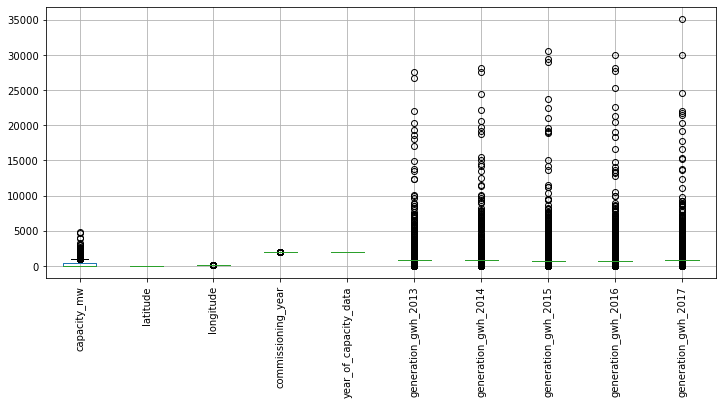

In [39]:
plt.figure(figsize=(12,5))
df.boxplot(rot=90)

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

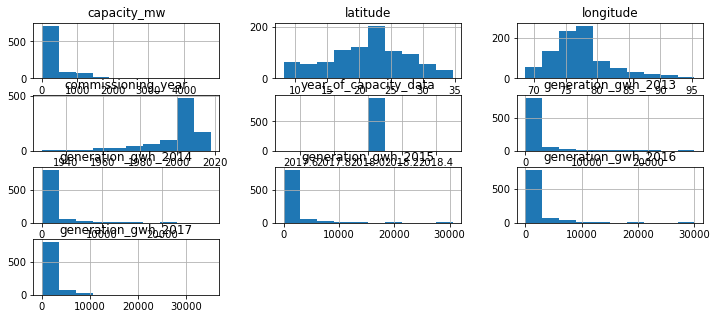

In [40]:
df.hist(figsize=(12,5))

<AxesSubplot:>

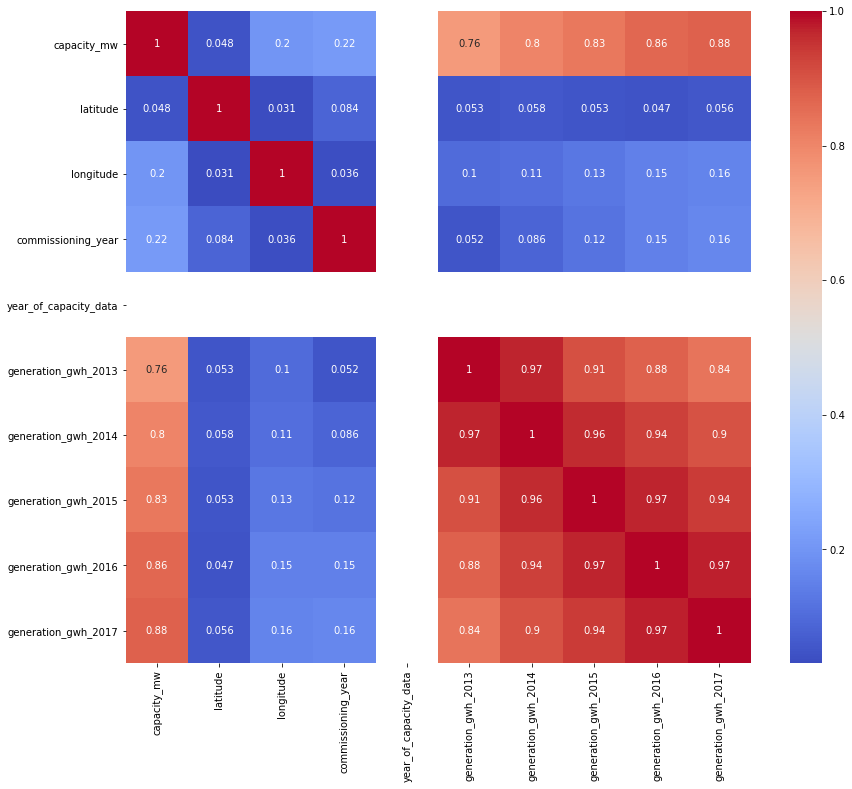

In [41]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Transforming the dataset

In [42]:
label_encoder=LabelEncoder()
df['primary_fuel']=label_encoder.fit_transform(df['primary_fuel'])
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,2018.0,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2000.0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700


Model Building

In [43]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [44]:
y=df['primary_fuel']
x=df.drop('primary_fuel',axis=1)

Train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=0)

In [46]:
x_train.head()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
663,10.0,18.7640,79.48730,2000.0,2018.0,797.063475,805.76000,701.02725,716.72835,807.6017
217,225.0,29.1411,78.96320,2016.0,2018.0,797.063475,805.76000,701.02725,477.65710,546.8230
539,5.0,21.7783,76.71925,1937.0,2018.0,797.063475,805.76000,701.02725,716.72835,807.6017
753,1.0,20.7325,83.46320,2000.0,2018.0,797.063475,805.76000,701.02725,716.72835,807.6017
623,1200.0,23.6220,86.66100,2015.0,2018.0,797.063475,11.47245,240.79990,1831.84000,2103.8239


In [47]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [48]:
rf.score(x_train,y_train)

0.986784140969163

Predicting for x_test

In [49]:
pred=rf.predict(x_test)

In [50]:
accuracy_score(y_test,pred)

0.6813509544787077